In [92]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'C:\\spark\\spark-3.0.1-bin-hadoop2.7'

In [93]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Customers").getOrCreate()

In [94]:
from pyspark.ml.regression import LinearRegression

In [95]:
dataset = spark.read.csv("Ecommerce_Customers.csv", inferSchema=True, header=True)

In [96]:
dataset #return type of data

DataFrame[Email: string, Address: string, Avg Session Length: double, Time on App: double, Time on Website: double, Length of Membership: double, Yearly Amount Spent: double]

In [97]:
#dataset.show()
dataset.show(5)

+--------------------+--------------------+------------------+-----------+---------------+--------------------+-------------------+
|               Email|             Address|Avg Session Length|Time on App|Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+------------------+-----------+---------------+--------------------+-------------------+
|mstephenson@ferna...|835 Frank TunnelW...|       34.49726773|12.65565115|    39.57766802|         4.082620633|         587.951054|
|   hduke@hotmail.com|4547 Archer Commo...|       31.92627203|11.10946073|    37.26895887|         2.664034182|        392.2049334|
|    pallen@yahoo.com|24645 Valerie Uni...|       33.00091476|11.33027806|    37.11059744|         4.104543202|        487.5475049|
|riverarebecca@gma...|1414 David Throug...|       34.30555663|13.71751367|    36.72128268|         3.120178783|         581.852344|
|mstephens@davidso...|14023 Rodriguez P...|       33.33067252|12.79518855|  

In [98]:
dataset.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



sklearn 
x1 x2 x3 x4 (independently but together features)   Y1(dependent)-->model --> predict

PySpark
group independent features
[x1, x2, x3, x4]  Y1(dependent)-->model --> predict

In [99]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler  #A feature transformer that merges multiple columns into a vector column
#group of all the vectors

In [100]:
dataset.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



In [101]:
dataset.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Email,500,None,None,aaron04@yahoo.com,zscott@wright.com
Address,500,None,None,"0001 Mack MillNorth Jennifer, NE 42021-5936",Unit 7502 Box 8345DPO AE 53747
Avg Session Length,500,33.05319351824,0.9925631111602911,29.53242897,36.13966249
Time on App,500,12.052487936928012,0.9942156084624618,8.508152176,15.12699429
Time on Website,500,37.060445421080004,1.0104889068105993,33.91384725,40.00518164
Length of Membership,500,3.5334615559300007,0.9992775024367542,0.26990109,6.922689335
Yearly Amount Spent,500,499.3140382608002,79.31478155115914,256.6705823,765.5184619


In [102]:
featureAssembler = VectorAssembler(inputCols = ["Avg Session Length","Time on App","Time on Website","Length of Membership"], outputCol="Independent features")

In [103]:
#Transform the dataset
output_data = featureAssembler.transform(dataset)

In [104]:
output_data.show(1)

+--------------------+--------------------+------------------+-----------+---------------+--------------------+-------------------+--------------------+
|               Email|             Address|Avg Session Length|Time on App|Time on Website|Length of Membership|Yearly Amount Spent|Independent features|
+--------------------+--------------------+------------------+-----------+---------------+--------------------+-------------------+--------------------+
|mstephenson@ferna...|835 Frank TunnelW...|       34.49726773|12.65565115|    39.57766802|         4.082620633|         587.951054|[34.49726773,12.6...|
+--------------------+--------------------+------------------+-----------+---------------+--------------------+-------------------+--------------------+
only showing top 1 row



In [105]:
output_data.select("Independent features")

DataFrame[Independent features: vector]

In [106]:
output_data.select("Independent features").show()

+--------------------+
|Independent features|
+--------------------+
|[34.49726773,12.6...|
|[31.92627203,11.1...|
|[33.00091476,11.3...|
|[34.30555663,13.7...|
|[33.33067252,12.7...|
|[33.87103788,12.0...|
|[32.0215955,11.36...|
|[32.73914294,12.3...|
|[33.9877729,13.38...|
|[31.93654862,11.8...|
|[33.99257277,13.3...|
|[33.87936082,11.5...|
|[29.53242897,10.9...|
|[33.19033404,12.9...|
|[32.38797585,13.1...|
|[30.73772037,12.6...|
|[32.1253869,11.73...|
|[32.33889932,12.0...|
|[32.18781205,14.7...|
|[32.61785606,13.9...|
+--------------------+
only showing top 20 rows



In [107]:
output_data.columns

['Email',
 'Address',
 'Avg Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent',
 'Independent features']

In [108]:
#final_data = [x1,x2,x3,x4] + Y1

final_data = output_data.select("Independent features", "Yearly Amount Spent")

In [109]:
final_data.show(4)

+--------------------+-------------------+
|Independent features|Yearly Amount Spent|
+--------------------+-------------------+
|[34.49726773,12.6...|         587.951054|
|[31.92627203,11.1...|        392.2049334|
|[33.00091476,11.3...|        487.5475049|
|[34.30555663,13.7...|         581.852344|
+--------------------+-------------------+
only showing top 4 rows



In [110]:
train_data , test_data = final_data.randomSplit([0.75, 0.25])

In [111]:
train_data.show(4)

+--------------------+-------------------+
|Independent features|Yearly Amount Spent|
+--------------------+-------------------+
|[30.39318454,11.8...|        319.9288698|
|[30.4925367,11.56...|        282.4712457|
|[30.57436368,11.3...|        442.0644138|
|[30.81620065,11.8...|        266.0863409|
+--------------------+-------------------+
only showing top 4 rows



In [112]:
regressor = LinearRegression(featuresCol = "Independent features", labelCol = "Yearly Amount Spent")
regressor = regressor.fit(train_data)

$y = mx +c$, 
    $m$ - coefficient
    $c$ - Intercept

In [113]:
regressor.coefficients #slope

DenseVector([26.0472, 38.8888, 0.3105, 61.1333])

In [114]:
regressor.intercept

-1058.1782699126802

In [115]:
predicted_results = regressor.evaluate(test_data)

In [116]:
predicted_results.predictions.show(20)

+--------------------+-------------------+------------------+
|Independent features|Yearly Amount Spent|        prediction|
+--------------------+-------------------+------------------+
|[29.53242897,10.9...|        408.6403511|396.31784319233907|
|[30.73772037,12.6...|        461.7807422|450.39339211255924|
|[30.87948434,13.2...|           490.2066|493.24427479135534|
|[30.97167564,11.7...|        494.6386098|486.56230689120457|
|[31.06621816,11.7...|        448.9332932|460.75477114277624|
|[31.12397435,12.3...|        486.9470538|507.44105021967243|
|[31.28344748,12.7...|        591.7810894| 568.4000302231439|
|[31.30919264,11.9...|        432.7207178| 429.1487376165737|
|[31.3123496,11.68...|         463.591418| 443.5823913528493|
|[31.5171218,10.74...|        275.9184207|  280.012318485019|
|[31.6005122,12.22...|        479.1728515|460.43361481662805|
|[31.66104982,11.3...|        416.3583536| 416.6487594161481|
|[31.6739155,12.32...|        475.7250679|501.27391371284943|
|[31.721

In [117]:
print("Root Mean Squared Error (RMSE) on test data = %f"% predicted_results.rootMeanSquaredError)
print("r2 = %f"% predicted_results.r2)

Root Mean Squared Error (RMSE) on test data = 9.907177
r2 = 0.985580


In [118]:
type(predicted_results.predictions.select("prediction"))

pyspark.sql.dataframe.DataFrame

In [122]:
#Convert DataFrame into Python Pandas List
actual = predicted_results.predictions.toPandas()["Yearly Amount Spent"].values.tolist()
predicted = predicted_results.predictions.toPandas()['prediction'].values.tolist()

In [123]:
print(len(actual),len(predicted))

121 121


In [124]:
import matplotlib.pyplot as plt

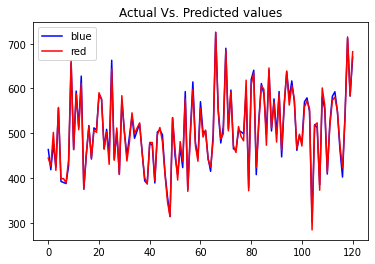

In [125]:
plt.plot(actual, color='blue')
plt.plot(predicted,color='red')
plt.title("Actual Vs. Predicted values")
plt.legend(["blue", "red"])
plt.show()

In [ ]:
sc.stop()